In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('drive/MyDrive/diabetes/cleaned_diabetic_data.csv', na_values=['?', 'NaN']).drop('Unnamed: 0', axis=1)
df['readmitted'].replace({'>30': 'YES', '<30': 'YES'}, inplace=True)
df['readmitted'].replace({'YES': '1', 'NO': '0'}, inplace=True)


In [3]:
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
glipizide                   0
glyburide                   0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
insulin   

filling missing weight, race and dropping diag_1, diag_2, diag_3 if missing

payer_code isnt relevant since insurance != diabetes
and medical_specialty can be observed deeper if I combine the datasets we have


In [4]:
grouped_weight = df.groupby(['age', 'race', 'gender'])['weight'].value_counts(normalize=True).unstack().fillna(0)
grouped_weight

weight                       [0-25)  [100-125)  [125-150)  [150-175)  \
age  race            gender                                            
5.0  AfricanAmerican Female     0.0        0.0        0.0        0.0   
                     Male       0.0        0.0        0.0        0.0   
     Asian           Female     0.0        0.0        0.0        0.0   
                     Male       0.0        0.0        0.0        0.0   
     Caucasian       Female     0.0        0.0        0.0        0.0   
...                             ...        ...        ...        ...   
95.0 Caucasian       Male       0.0        0.0        0.0        0.0   
     Hispanic        Female     0.0        0.0        0.0        0.0   
                     Male       0.0        0.0        0.0        0.0   
     Other           Female     0.0        0.0        0.0        0.0   
                     Male       0.0        0.0        0.0        0.0   

weight                       [175-200)   [25-50)   [50-75)  [75-100)  
age  race            gender                                           
5.0  AfricanAmerican Female        0.0  0.000000  0.000000  1.000000  
                     Male          0.0  0.000000  0.000000  1.000000  
     Asian           Female        0.0  0.000000  0.000000  1.000000  
                     Male          0.0  0.000000  0.000000  1.000000  
     Caucasian       Female        0.0  0.013889  0.000000  0.986111  
...                                ...       ...       ...       ...  
95.0 Caucasian       Male          0.0  0.002954  0.014771  0.982275  
     Hispanic        Female        0.0  0.000000  0.000000  1.000000  
                     Male          0.0  0.000000  0.000000  1.000000  
     Other           Female        0.0  0.000000  0.000000  1.000000  
                     Male          0.0  0.000000  0.000000  1.000000  

[97 rows x 8 columns]

In [5]:
mapping = {
    ('[0-10)', 'Caucasian', 'Male'): '[0-25)',
    ('[0-10)', 'Other', 'Male'): '[0-25)',
    ('[0-10)', 'Caucasian', 'Female'): '[0-25)',
    ('[0-10)', 'Other', 'Female'): '[0-25)',
    ('[10-20)', 'Caucasian', 'Male'): '[50-75)',
    ('[10-20)', 'Caucasian', 'Female'): '[50-75)',
    ('[10-20)', 'AfricanAmerican', 'Female'): '[50-75)',
    ('[10-20)', 'AfricanAmerican', 'Male'): '[35-50)',
    ('[20-30)', 'Caucasian', 'Male'): '[50-75)',
    ('[20-30)', 'AfricanAmerican', 'Male'): '[50-75)',
    ('[20-30)', 'Caucasian', 'Female'): '[50-75)',
    ('[20-30)', 'AfricanAmerican', 'Female'): '[75-100)',
    ('[30-40)', 'Caucasian', 'Male'): '[50-75)',
    ('[30-40)', 'Other', 'Male'): '[50-75)',
    ('[30-40)', 'AfricanAmerican', 'Male'): '[100-125)',
    ('[30-40)', 'Other', 'Female'): '[50-75)',
    ('[30-40)', 'Caucasian', 'Female'): '[125-100)',
    ('[30-40)', 'AfricanAmerican', 'Female'): '[75-100)',
    ('[40-50)', 'Caucasian', 'Male'): '[75-100)',
    ('[40-50)', 'Other', 'Male'): '[75-100)',
    ('[40-50)', 'AfricanAmerican', 'Male'): '[100-125)',
    ('[40-50)', 'Other', 'Female'): '[75-100)',
    ('[40-50)', 'Caucasian', 'Female'): '[25-50)',
    ('[40-50)', 'AfricanAmerican', 'Female'): '[100-125)',
    ('[50-60)', 'Caucasian', 'Male'): '[75-100)',
    ('[50-60)', 'Other', 'Male'): '[75-100)',
    ('[50-60)', 'AfricanAmerican', 'Male'): '[100-125)',
    ('[50-60)', 'Asian', 'Male'): '[50-75)',
    ('[50-60)', 'Caucasian', 'Female'): '[125-150)',
    ('[50-60)', 'Other', 'Female'): '[50-75)',
    ('[50-60)', 'AfricanAmerican', 'Female'): '[100-125)',
    ('[50-60)', 'Asian', 'Female'): '[50-75)',
    ('[60-70)', 'Caucasian', 'Male'): '[75-100)',
    ('[60-70)', 'Other', 'Male'): '[50-75)',
    ('[60-70)', 'AfricanAmerican', 'Male'): '[125-150)',
    ('[60-70)', 'Asian', 'Male'):'[75-100)',
    ('[60-70)', 'Caucasian', 'Female'): '[75-100)',
    ('[60-70)', 'Asian', 'Female'):'[75-100)',
    ('[60-70)', 'Other', 'Female'): '[75-100)',
    ('[60-70)', 'AfricanAmerican', 'Female'): '[75-100)',
    ('[70-80)', 'Caucasian', 'Male'): '[75-100)',
    ('[70-80)', 'Other', 'Male'): '[75-100)',
    ('[70-80)', 'AfricanAmerican', 'Male'): '[75-100)',
    ('[70-80)', 'Asian', 'Male'): '[75-100)',
    ('[70-80)', 'Caucasian', 'Female'): '[75-100)',
    ('[70-80)', 'Other', 'Female'): '[75-100)',
    ('[70-80)', 'AfricanAmerican', 'Female'): '[75-100)',
    ('[70-80)', 'Asian', 'Female'): '[50-75)',
    ('[80-90)', 'Caucasian', 'Male'): '[75-100)',
    ('[80-90)', 'Other', 'Male'): '[50-75)',
    ('[80-90)', 'Caucasian', 'Female'): '[50-75)',
    ('[80-90)', 'Other', 'Female'): '[50-75)',
    ('[80-90)', 'Asian', 'Male'): '[50-75)',
    ('[80-90)', 'Asian', 'Female'): '[50-75)',
    ('[90-100)', 'Caucasian', 'Male'): '[75-100)',
    ('[90-100)', 'Caucasian', 'Female'): '[50-75)',
    ('[90-100)', 'AfricanAmerican', 'Female'): '[75-100)',
    ('[90-100)', 'AfricanAmerican', 'Male'): '[75-100)'
}

missing_weight = df[df['weight'].isnull()]

def map_weights(row):
    key = (row['age'], row['race'], row['gender'])
    return mapping.get(key, np.nan)

missing_weight['weight'] = missing_weight.apply(map_weights, axis=1)

df.update(missing_weight)

df['weight'].fillna('[75-100)', inplace=True)
df['race'].fillna('Caucasian', inplace=True)
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,glyburide,pioglitazone,rosiglitazone,acarbose,miglitol,insulin,glyburide-metformin,change,diabetesMed,readmitted
0,2278392.0,8222157.0,Caucasian,Female,5.0,[75-100),Emergency,Discharged to Home,Referral,1.0,...,No,No,No,No,No,No,No,No,No,0.0
1,149190.0,55629189.0,Caucasian,Female,15.0,[75-100),Emergency,Discharged to Home,Emergency,3.0,...,No,No,No,No,No,Up,No,Ch,Yes,0.0
2,64410.0,86047875.0,AfricanAmerican,Female,25.0,[75-100),Emergency,Discharged to Home,Emergency,2.0,...,No,No,No,No,No,No,No,No,Yes,0.0
3,500364.0,82442376.0,Caucasian,Male,35.0,[75-100),Emergency,Discharged to Home,Emergency,2.0,...,No,No,No,No,No,Up,No,Ch,Yes,0.0
4,16680.0,42519267.0,Caucasian,Male,45.0,[75-100),Emergency,Discharged to Home,Emergency,1.0,...,No,No,No,No,No,Steady,No,Ch,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97911,443847548.0,100162476.0,AfricanAmerican,Male,75.0,[75-100),Emergency,Other,Emergency,3.0,...,No,No,No,No,No,Down,No,Ch,Yes,0.0
97912,443847782.0,74694222.0,AfricanAmerican,Female,85.0,[75-100),Emergency,Other,Other,5.0,...,No,No,No,No,No,Steady,No,No,Yes,0.0
97913,443854148.0,41088789.0,Caucasian,Male,75.0,[75-100),Emergency,Discharged to Home,Emergency,1.0,...,No,No,No,No,No,Down,No,Ch,Yes,0.0
97914,443857166.0,31693671.0,Caucasian,Female,85.0,[75-100),Emergency,Other,Emergency,10.0,...,No,Steady,No,No,No,Up,No,Ch,Yes,0.0


| age group | race         | male     | female   |
|-----------|--------------|----------|----------|
| 0-10      | Caucasian    | 0-25     |          |
|           | Other        | 0-25     |          |
| 10-20     | Caucasian    | 50-75    | 50-75    |
|           | African Amer.| 35-50    | 50-75    |
| 20-30     | Caucasian    | 50-75    | 50-75    |
|           | African Amer.| 50-75    | 75-100   |
| 30-40     | Caucasian    | 50-75    | 125-150  |
|           | Other        | 50-75    |          |
|           | African Amer.| 100-125  | 75-100   |
| 40-50     | Caucasian    | 75-100   | 25-50    |
|           | Other        | 75-100   |          |
|           | African Amer.| 100-125  | 100-125  |
| 50-60     | Caucasian    | 75-100   | 125-150  |
|           | Other        | 75-100   | 50-75    |
|           | African Amer.| 100-125  | 100-125  |
|           | Asian        | 50-75    | 50-75    |
| 60-70     | Caucasian    | 75-100   | 75-100   |
|           | Other        | 50-75    | 75-100   |
|           | African Amer.| 125-150  | 75-100   |
|           | Asian        |          | 50-75    |
| 70-80     | Caucasian    | 75-100   | 75-100   |
|           | Other        | 75-100   | 75-100   |
|           | African Amer.| 75-100   | 75-100   |
|           | Asian        | 75-100   | 50-75    |
| 80-90     | Caucasian    | 75-100   | 50-75    |
|           | Other        |          | 50-75    |
|           | Asian        | 50-75    |          |
| 90-100    | Caucasian    | 75-100   | 50-75    |
|           | African Amer.|          | 50-75    |


In [6]:
df['diag_1'] = df.groupby(['age', 'gender', 'race'])['diag_1'].fillna(method='ffill')
df['diag_2'] = df.groupby(['age', 'gender', 'race'])['diag_1'].fillna(method='ffill')
df['diag_3'] = df.groupby(['age', 'gender', 'race'])['diag_1'].fillna(method='ffill')

In [7]:
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
glipizide                   0
glyburide                   0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
insulin   

In [8]:
print(df.shape)
df.columns

(97916, 38)


Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin',
       'glyburide-metformin', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

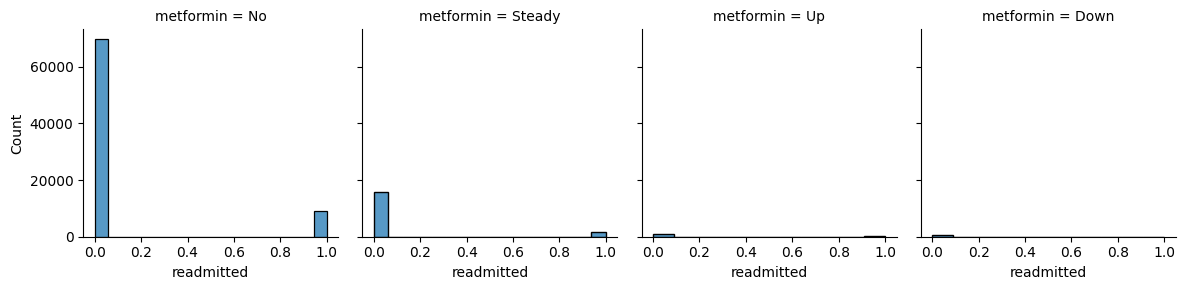

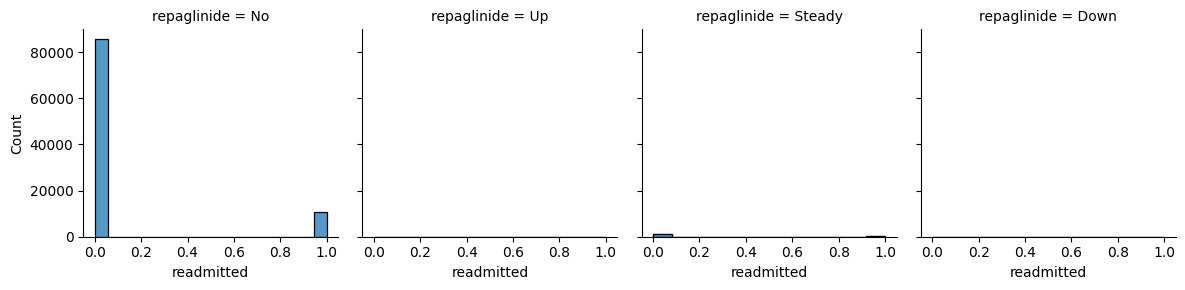

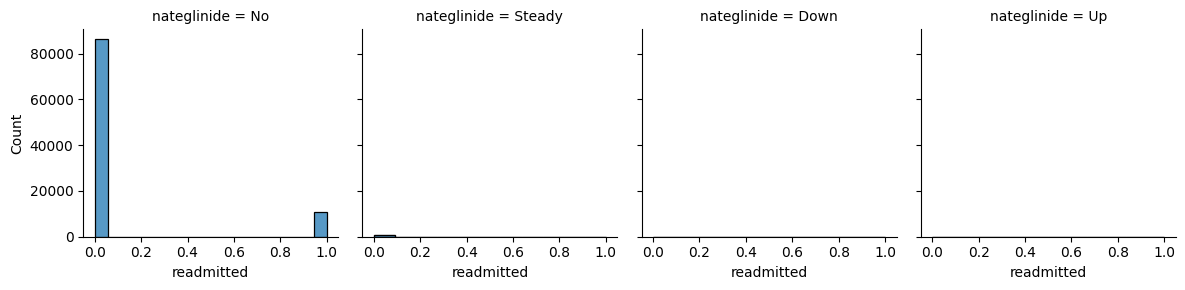

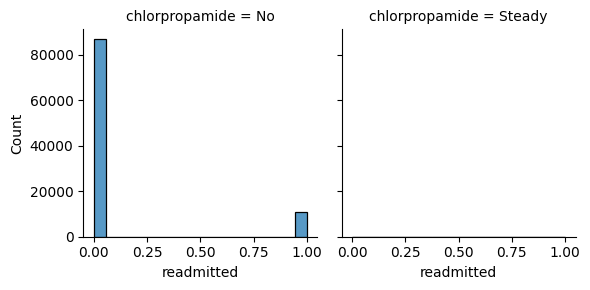

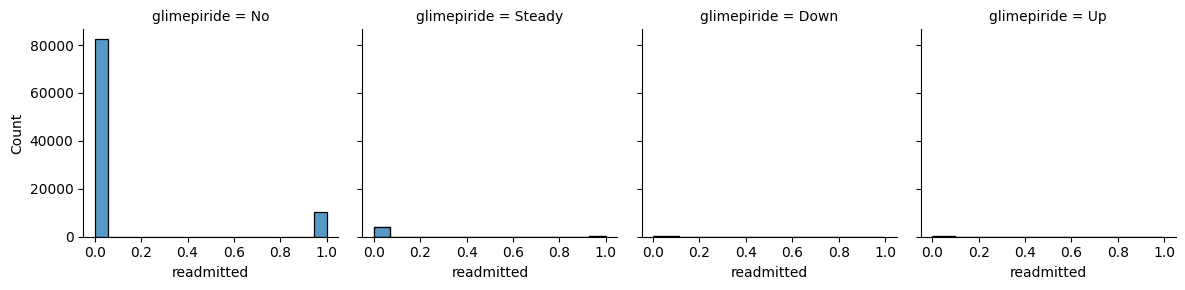

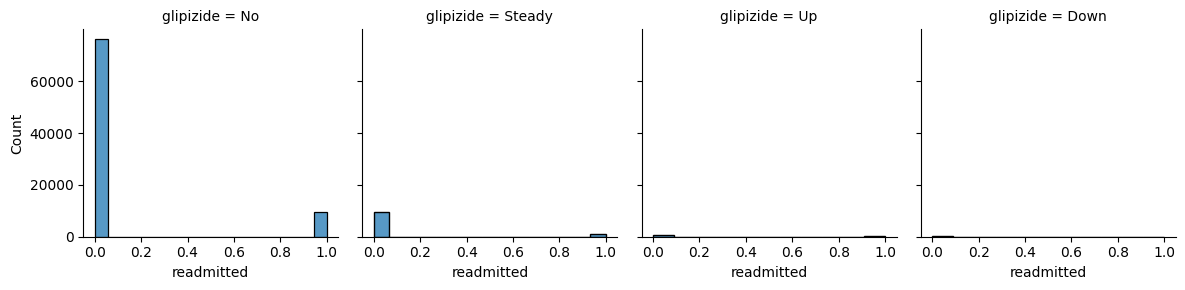

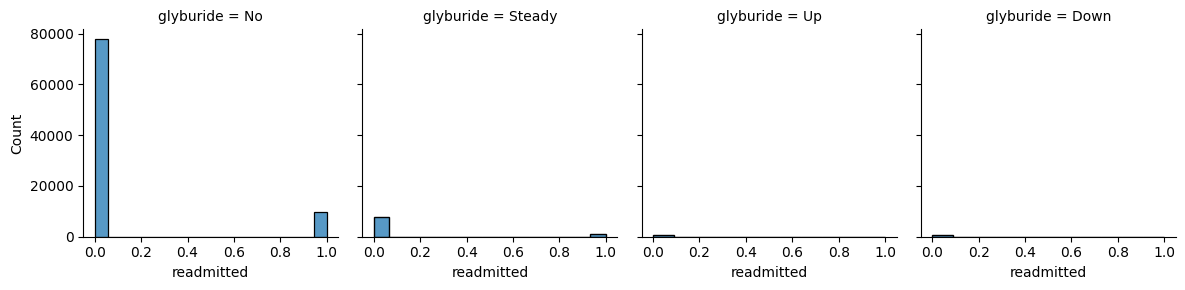

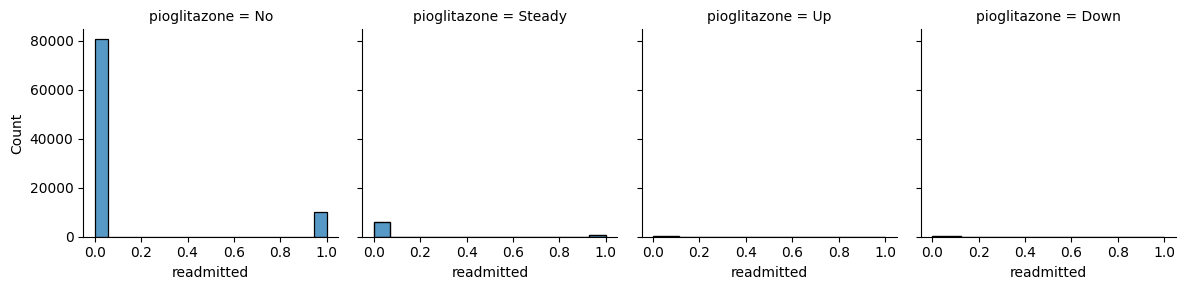

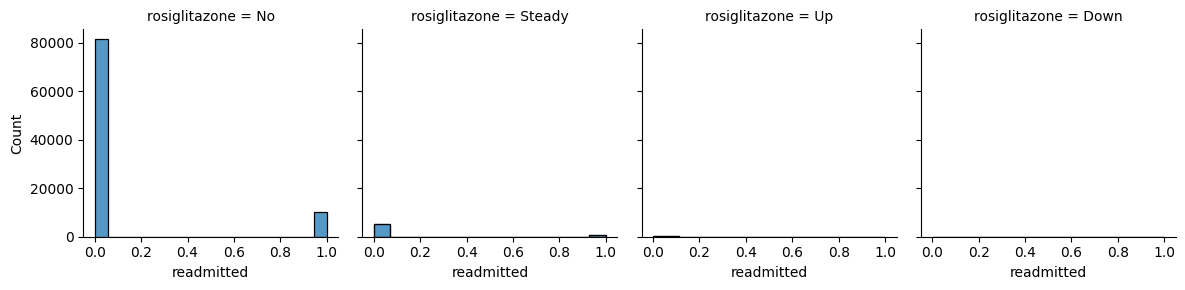

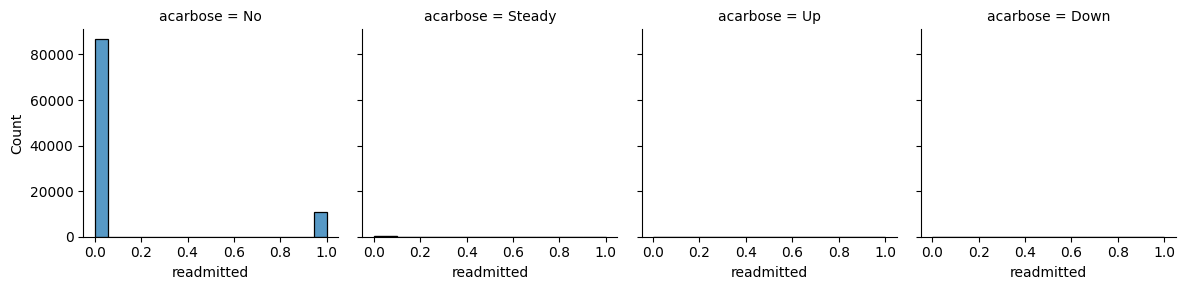

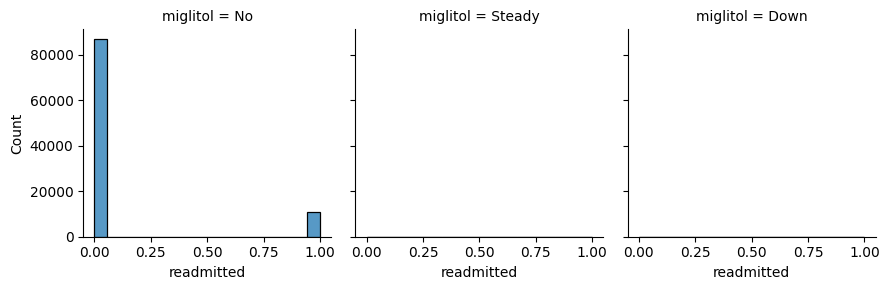

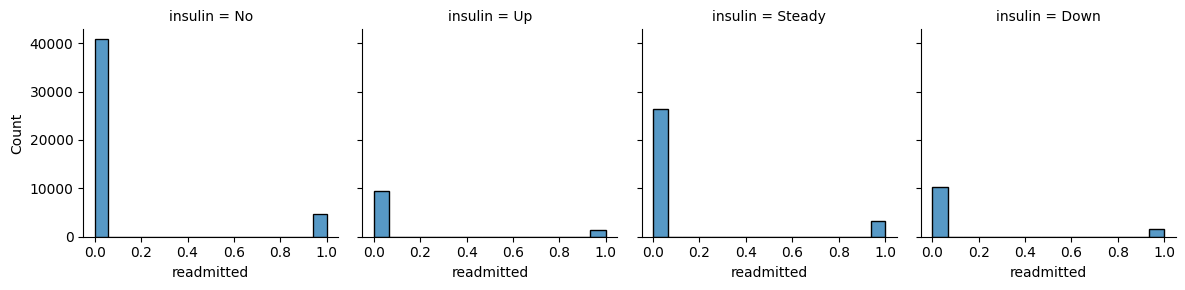

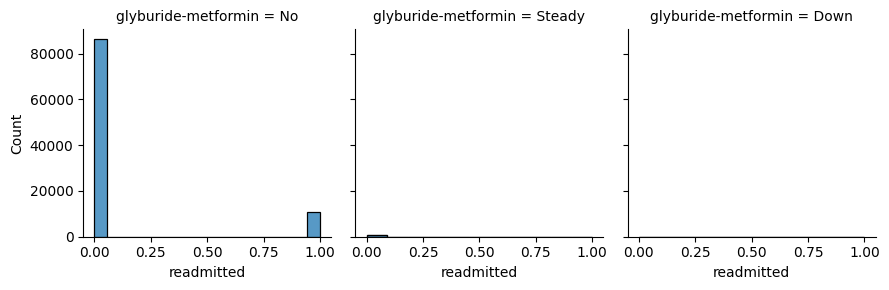

In [9]:
medication_columns = ['metformin', 'repaglinide', 'nateglinide','chlorpropamide',
                      'glimepiride', 'glipizide', 'glyburide','pioglitazone',
                      'rosiglitazone', 'acarbose', 'miglitol', 'insulin','glyburide-metformin']

for column in medication_columns:
    g = sns.FacetGrid(df, col=column)
    g.map(sns.histplot, "readmitted")
    plt.show()

In [10]:
df.nunique()

encounter_id                97916
patient_nbr                 69214
race                            5
gender                          2
age                            10
weight                          8
admission_type_id               3
discharge_disposition_id        2
admission_source_id             3
time_in_hospital               14
num_lab_procedures            117
num_procedures                  7
num_medications                75
number_outpatient              37
number_emergency               32
number_inpatient               21
diag_1                        451
diag_2                        451
diag_3                        451
number_diagnoses               16
max_glu_serum                   4
A1Cresult                       4
metformin                       4
repaglinide                     4
nateglinide                     4
chlorpropamide                  2
glimepiride                     4
glipizide                       4
glyburide                       4
pioglitazone  

Conclusion:
Nodes:

    Patient Nodes:
        patient_nbr, race, gender, age, weight, payer_code, etc.
        Each unique patient number (patient_nbr) represents a distinct patient node, with associated demographic information (race, gender, age, etc.), medical history (payer_code), and other attributes.

    Medical Entity Nodes:
        diag_1, diag_2, diag_3, medical_specialty, etc.
        Nodes representing medical diagnoses (diag_1, diag_2, diag_3) or medical specialties (medical_specialty) can be separate nodes. Each unique diagnosis code or specialty represents a node in the graph.

    Medication Nodes:
        metformin, repaglinide, insulin, etc.
        Nodes representing different medications, where each unique medication becomes a node in the graph.

    Procedure Nodes:
        num_procedures, information related to procedures performed.
        Nodes representing different procedures performed on patients.

    Lab Test Nodes:
        num_lab_procedures, information about lab tests conducted.
        Nodes representing various lab tests performed on patients.

    Admission/Discharge Nodes:
        admission_type_id, discharge_disposition_id, admission_source_id.
        Nodes representing different admission types, discharge dispositions, and sources of admission.

Edges:

    Patient-Related Edges:
        Edges connecting patient nodes to their demographic attributes, medical history, and admission details.

    Diagnosis-Related Edges:
        Edges connecting patient nodes to their diagnoses (diag_1, diag_2, diag_3).

    Medication-Related Edges:
        Edges connecting patient nodes to the medications they have been prescribed or have taken (metformin, repaglinide, etc.).

    Procedure and Lab Test Edges:
        Edges connecting patient nodes to the procedures (num_procedures) and lab tests (num_lab_procedures) they have undergone.

    Admission-Related Edges:
        Edges connecting patient nodes to their admission type, discharge disposition, and admission source.

In [11]:
df.drop(['encounter_id', 'patient_nbr'], axis=1)

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,glyburide,pioglitazone,rosiglitazone,acarbose,miglitol,insulin,glyburide-metformin,change,diabetesMed,readmitted
0,Caucasian,Female,5.0,[75-100),Emergency,Discharged to Home,Referral,1.0,41.0,0.0,...,No,No,No,No,No,No,No,No,No,0.0
1,Caucasian,Female,15.0,[75-100),Emergency,Discharged to Home,Emergency,3.0,59.0,0.0,...,No,No,No,No,No,Up,No,Ch,Yes,0.0
2,AfricanAmerican,Female,25.0,[75-100),Emergency,Discharged to Home,Emergency,2.0,11.0,5.0,...,No,No,No,No,No,No,No,No,Yes,0.0
3,Caucasian,Male,35.0,[75-100),Emergency,Discharged to Home,Emergency,2.0,44.0,1.0,...,No,No,No,No,No,Up,No,Ch,Yes,0.0
4,Caucasian,Male,45.0,[75-100),Emergency,Discharged to Home,Emergency,1.0,51.0,0.0,...,No,No,No,No,No,Steady,No,Ch,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97911,AfricanAmerican,Male,75.0,[75-100),Emergency,Other,Emergency,3.0,51.0,0.0,...,No,No,No,No,No,Down,No,Ch,Yes,0.0
97912,AfricanAmerican,Female,85.0,[75-100),Emergency,Other,Other,5.0,33.0,3.0,...,No,No,No,No,No,Steady,No,No,Yes,0.0
97913,Caucasian,Male,75.0,[75-100),Emergency,Discharged to Home,Emergency,1.0,53.0,0.0,...,No,No,No,No,No,Down,No,Ch,Yes,0.0
97914,Caucasian,Female,85.0,[75-100),Emergency,Other,Emergency,10.0,45.0,2.0,...,No,Steady,No,No,No,Up,No,Ch,Yes,0.0


In [12]:
float_columns = df.select_dtypes(include=['float64'])
df[float_columns.columns] = float_columns.astype(int)
numerical_columns = df.select_dtypes(include=['int64']).columns.tolist()
object_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Numerical Columns:")
print(numerical_columns)

print("\nObject (Categorical) Columns:")
print(object_columns)


Numerical Columns:
['encounter_id', 'patient_nbr', 'age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'readmitted']

Object (Categorical) Columns:
['race', 'gender', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'change', 'diabetesMed']


In [13]:
identifiers = ['encounter_id', 'patient_nbr']
label = ['readmitted']

In [14]:
for column in df[numerical_columns]:
    distinct_values = df[column].unique()
    print(f"Column: {column}")
    print(distinct_values)
    print("\n")

Column: encounter_id
[  2278392    149190     64410 ... 443854148 443857166 443867222]


Column: patient_nbr
[  8222157  55629189  86047875 ... 120975314  86472243 175429310]


Column: age
[ 5 15 25 35 45 55 65 75 85 95]


Column: time_in_hospital
[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]


Column: num_lab_procedures
[ 41  59  11  44  51  31  70  73  68  33  47  62  60  55  49  75  45  29
  35  42  66  36  19  64  25  52  87  53  27  46  28  48  10  65  67  54
  58  37   2  57  43  32  83  34  39  69  38  72  56  22  78  61  88  50
   1  18  82   9  63  24  77  71  81  76  90  40  93   3 103  13  80  85
  16  15  12  30  23  17  21  79  26   5  95  97  84  14  74 105  86  98
  20   6  94   8 102 100   7  91  92  96   4  89 101 114 113 111 129 107
 108 106 104  99 109 120 121 126 118]


Column: num_procedures
[0 5 1 6 2 3 4]


Column: num_medications
[ 1 18 13 16  8 21 12 28 17 11 15 31  2 23 19  7 14 10 20 22  9 25  4 32
  6 30 26 24 33  5 27 39  3 29 61 40 46 41 36 34 35 50 43 42 37

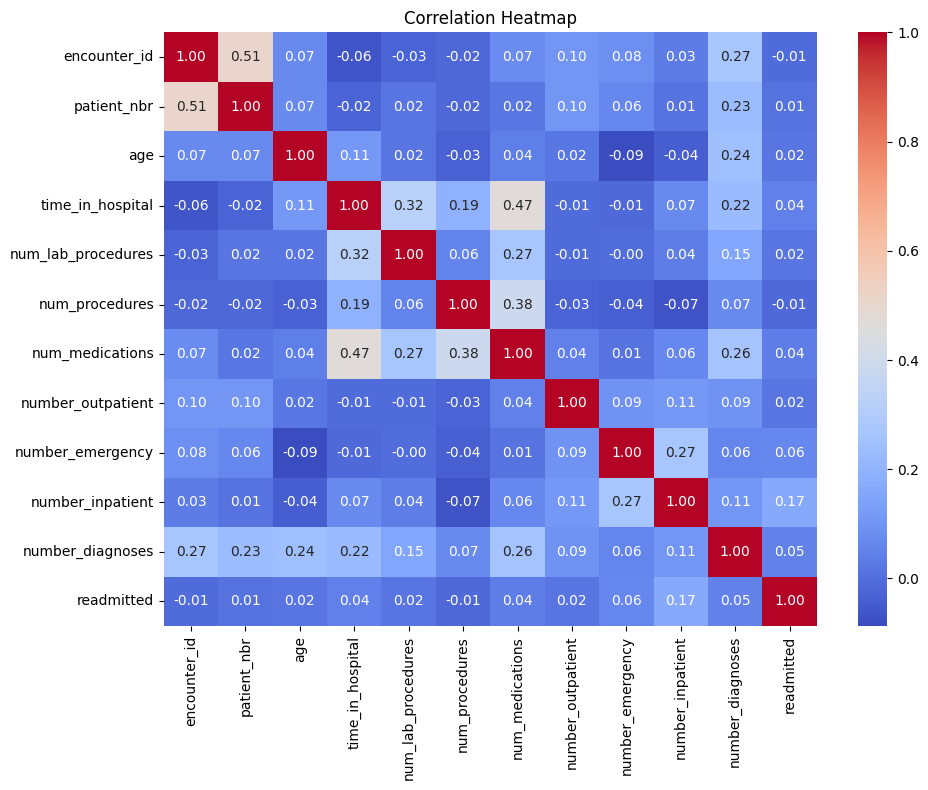

In [22]:
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig('drive/MyDrive/diabetes/correlationHeatmap.png')
plt.show()

In [ ]:
for column in df[object_columns]:
    distinct_values = df[column].unique()
    print(f"Column: {column}")
    print(distinct_values)
    print("\n")

Column: race
['Caucasian' 'AfricanAmerican' 'Other' 'Asian' 'Hispanic']


Column: gender
['Female' 'Male']


Column: weight
['[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)']


Column: admission_type_id
['Emergency' 'Elective' 'New Born']


Column: discharge_disposition_id
['Discharged to Home' 'Other']


Column: admission_source_id
['Referral' 'Emergency' 'Other']


Column: diag_1
['250.83' '276' '648' '8' '197' '414' '428' '398' '434' '250.7' '157'
 '518' '999' '410' '682' '402' '737' '572' 'V57' '189' '786' '427' '996'
 '584' '462' '411' '174' '486' '998' '511' '626' '250.6' '618' '182' '845'
 '423' '808' '250.4' '722' '403' '250.11' '784' '707' '440' '151' '715'
 '997' '198' '564' '812' '38' '590' '556' '578' '433' 'V58' '569' '185'
 '536' '255' '250.13' '599' '558' '574' '491' '560' '244' '250.03' '577'
 '730' '188' '824' '250.8' '332' '562' '291' '296' '510' '401' '263' '438'
 '70' '250.02' '493' '642' '625' '571' '738' '593' '250.42' '807'

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df_encoded = pd.get_dummies(df, columns = object_columns , dtype = int)
df_encoded


,encounter_id,patient_nbr,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
0,2278392,8222157,5,1,41,0,1,0,0,0,...,1,0,0,0,1,0,0,1,1,0
1,149190,55629189,15,3,59,0,18,0,0,0,...,0,0,1,0,1,0,1,0,0,1
2,64410,86047875,25,2,11,5,13,2,0,1,...,1,0,0,0,1,0,0,1,0,1
3,500364,82442376,35,2,44,1,16,0,0,0,...,0,0,1,0,1,0,1,0,0,1
4,16680,42519267,45,1,51,0,8,0,0,0,...,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97911,443847548,100162476,75,3,51,0,16,0,0,0,...,0,0,0,0,1,0,1,0,0,1
97912,443847782,74694222,85,5,33,3,18,0,0,1,...,0,1,0,0,1,0,0,1,0,1
97913,443854148,41088789,75,1,53,0,9,1,0,0,...,0,0,0,0,1,0,1,0,0,1
97914,443857166,31693671,85,10,45,2,21,0,0,1,...,0,0,1,0,1,0,1,0,0,1


In [ ]:
unique_count = df_encoded['readmitted'].unique().tolist()

print("Unique count:", unique_count)

Unique count: [0, 1]


In [ ]:
df_ = df_encoded.drop(['encounter_id', 'patient_nbr'], axis=1)

In [ ]:
df_.to_csv('drive/MyDrive/diabetes/diabetes_data_encoded.csv', )

In [ ]:
X= df_.drop(columns = ['readmitted'])
y = df_['readmitted']

In [ ]:
from sklearn import preprocessing
scaled_X = preprocessing.StandardScaler().fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.20, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((78332, 1445), (19584, 1445), (78332,), (19584,))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_prediction = lr.predict(X_test)


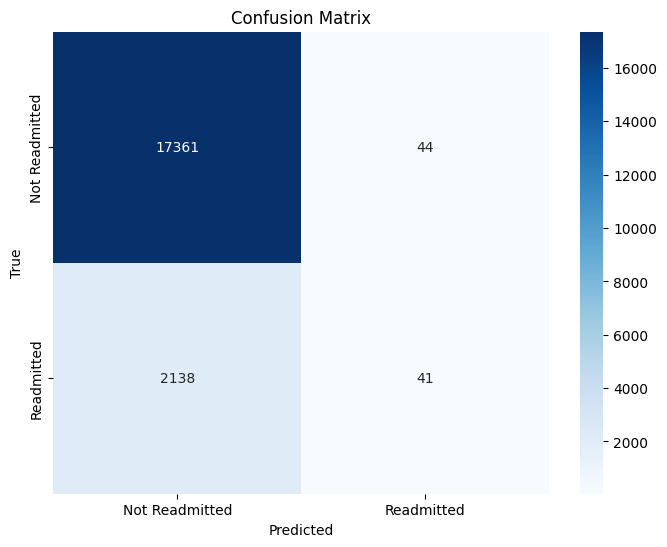

In [ ]:
conf_matrix = confusion_matrix(y_test, lr_prediction)
accuracy = accuracy_score(y_test, lr_prediction)
precision = precision_score(y_test, lr_prediction)
recall = recall_score(y_test, lr_prediction)
f1 = f1_score(y_test, lr_prediction)

metrics_dict = {
    'model': 'Logistic Reg',
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1
}
final = pd.DataFrame(metrics_dict, index=[0])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Readmitted', 'Readmitted'],
            yticklabels=['Not Readmitted', 'Readmitted'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
final

,model,accuracy,precision,recall,f1
0,Logistic Reg,0.888583,0.482353,0.018816,0.036219


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 50, max_depth=5, random_state=43)
rf.fit(X_train, y_train)
rf_prediction = rf.predict(X_test)

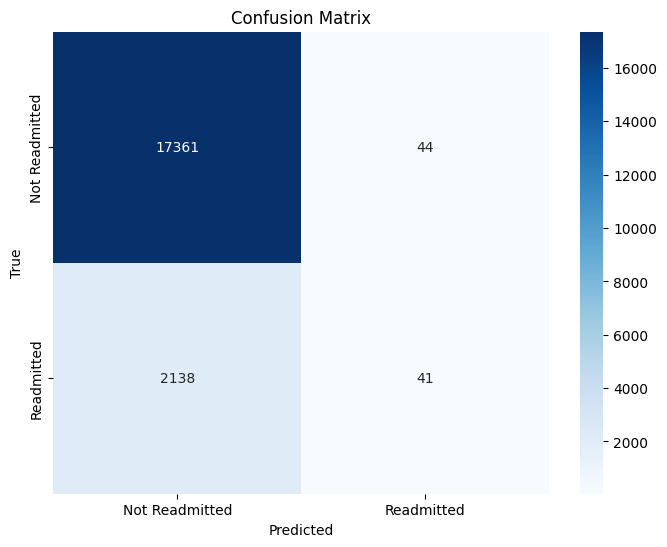

In [ ]:
conf_matrix = confusion_matrix(y_test, lr_prediction)
accuracy = accuracy_score(y_test, lr_prediction)
precision = precision_score(y_test, lr_prediction)
recall = recall_score(y_test, lr_prediction)
f1 = f1_score(y_test, lr_prediction)

# Creating a DataFrame for the model's metrics
metrics_dict = {
    'model': 'Random Forest',
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1
}
final = pd.concat([final, pd.DataFrame(metrics_dict, index=[0])])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Readmitted', 'Readmitted'],
            yticklabels=['Not Readmitted', 'Readmitted'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
final

,model,accuracy,precision,recall,f1
0,Logistic Reg,0.888583,0.482353,0.018816,0.036219
0,Random Forest,0.888583,0.482353,0.018816,0.036219
